## INTRODUCTION
The project aims to answer a question in the field Health insurance in France using Statistical data on the fees of liberal health professionals; using two Excel datasets extracted from ‘Ameli’ website:

    df1 = Workforce and density by department in 2018
    df2 = Total fees of health professionals by department in 2018

###   ** The query :*
   > Can we establish a **link** between the **density of physicians** by specialty and by territory and the **practice of exceeding fees** ? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing 1st DataFrame 

> the header of each first column of each sheet has been changed to **physicians**; the purpose is merging all in one column for clearer analysis 

In [2]:
df1 = pd.read_excel("ameli.xls", sheet_name=[2,3,4,5,6,7])

In [3]:
hp = pd.concat(df1, ignore_index=True)

In [4]:
hp.keys()

Index(['Spécialistes', 'DEPARTEMENT', 'EFFECTIF', 'POPULATION FRANCAISE',
       'DENSITE /100 000 hab.'],
      dtype='object')

In [5]:
hp.head()

,Spécialistes,DEPARTEMENT,EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.
0,02- Anesthésie-réanimation chirurgicale,01- Ain,18,653688.0,2.753607
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,19,528016.0,3.598376
2,02- Anesthésie-réanimation chirurgicale,03- Allier,17,333065.0,5.104109
3,02- Anesthésie-réanimation chirurgicale,04- Alpes-Hte-Provence,4,161980.0,2.469441
4,02- Anesthésie-réanimation chirurgicale,05- Hautes-Alpes,6,141784.0,4.231789


In [7]:
hp.isnull().sum()

Spécialistes             0
DEPARTEMENT              0
EFFECTIF                 0
POPULATION FRANCAISE     0
DENSITE /100 000 hab.    0
dtype: int64

## Importing 2nd DataFrame 

In [9]:
df2 = pd.read_excel("fees.xls", sheet_name=[2,3,4,5,6,7])

In [10]:
f_hp = pd.concat(df2, ignore_index=True)

In [11]:
f_hp.head()

,Spécialistes,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros)
0,02- Anesthésie-réanimation chirurgicale,01- Ain,18.0,5.13279e+06,2.6588e+06,0,7.79159e+06
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,19.0,5.26123e+06,456535,0,5.71777e+06
2,02- Anesthésie-réanimation chirurgicale,03- Allier,17.0,5.0744e+06,531455,0,5.60586e+06
3,02- Anesthésie-réanimation chirurgicale,04- Alpes-Hte-Provence,4.0,nc,nc,nc,nc
4,02- Anesthésie-réanimation chirurgicale,05- Hautes-Alpes,6.0,nc,nc,nc,nc


In [12]:
f_hp = f_hp.drop(['HONORAIRES SANS DEPASSEMENT (Euros)', 'FRAIS DE DEPLACEMENT (Euros)', 'TOTAL DES HONORAIRES (Euros)'] , axis=1)

### we have 'nc' values due to effective <11 therefore we replace nc with NaN for easy analysis later on

In [13]:
f_hp = f_hp.replace('nc', np.NaN)

In [14]:
f_hp.isna().sum()

Spécialistes               0
DEPARTEMENT                0
EFFECTIFS                  0
DEPASSEMENTS (Euros)    3481
dtype: int64

In [16]:
f_hp.head()

,Spécialistes,DEPARTEMENT,EFFECTIFS,DEPASSEMENTS (Euros)
0,02- Anesthésie-réanimation chirurgicale,01- Ain,18.0,2658795.49
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,19.0,456534.65
2,02- Anesthésie-réanimation chirurgicale,03- Allier,17.0,531455.38
3,02- Anesthésie-réanimation chirurgicale,04- Alpes-Hte-Provence,4.0,NaN
4,02- Anesthésie-réanimation chirurgicale,05- Hautes-Alpes,6.0,NaN


## Merging the two dataframes

df1 has 'EFFECTIF' column whereas df2 has 'EFFECTIFS' therefore:

In [17]:
hp = hp.rename({'EFFECTIF':'EFFECTIFS'}, axis=1)

In [18]:
df1_df2 = f_hp.merge(hp, how='left', on=['DEPARTEMENT','EFFECTIFS',
                                      'Spécialistes'])

In [19]:
df1_df2.head()

,Spécialistes,DEPARTEMENT,EFFECTIFS,DEPASSEMENTS (Euros),POPULATION FRANCAISE,DENSITE /100 000 hab.
0,02- Anesthésie-réanimation chirurgicale,01- Ain,18.0,2658795.49,653688.0,2.753607
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,19.0,456534.65,528016.0,3.598376
2,02- Anesthésie-réanimation chirurgicale,03- Allier,17.0,531455.38,333065.0,5.104109
3,02- Anesthésie-réanimation chirurgicale,04- Alpes-Hte-Provence,4.0,NaN,161980.0,2.469441
4,02- Anesthésie-réanimation chirurgicale,05- Hautes-Alpes,6.0,NaN,141784.0,4.231789


In [20]:
df1_df2.shape

(14040, 6)

### For enhanced analysis we import the dataframe with the speciality corresponding to each physician 

> On the excel file of df1, in sheet2 we have details **'Nomenclature des PS'** therefore we extract the two columns about speciality and the corresponding professional activity of physician

In [21]:
df3 = pd.read_excel("ameli.xls", sheet_name=8)

In [22]:
df3

,Specialité,Spécialistes
0,Spécialistes,TOTAL MEDECINS
1,Spécialistes,TOTAL SPECIALISTES
2,Spécialistes,02- Anesthésie-réanimation chirurgicale
3,Spécialistes,03- Pathologie cardio-vasculaire
4,Spécialistes,04- Chirurgie générale
...,...,...
135,Dentistes et ODF,"TOTAL CHIRURGIE DENTAIRE (19, 36, 53, 54)"
136,Laboratoires,30- Laboratoires
137,Laboratoires,39- Laboratoires polyvalents
138,Laboratoires,40- Laboratoires d’anatomo-cyto-pathologie


In [23]:
data = df1_df2.merge(df3, how='left', on=['Spécialistes'])

In [24]:
data.head()

,Spécialistes,DEPARTEMENT,EFFECTIFS,DEPASSEMENTS (Euros),POPULATION FRANCAISE,DENSITE /100 000 hab.,Specialité
0,02- Anesthésie-réanimation chirurgicale,01- Ain,18.0,2658795.49,653688.0,2.753607,Spécialistes
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,19.0,456534.65,528016.0,3.598376,Spécialistes
2,02- Anesthésie-réanimation chirurgicale,03- Allier,17.0,531455.38,333065.0,5.104109,Spécialistes
3,02- Anesthésie-réanimation chirurgicale,04- Alpes-Hte-Provence,4.0,NaN,161980.0,2.469441,Spécialistes
4,02- Anesthésie-réanimation chirurgicale,05- Hautes-Alpes,6.0,NaN,141784.0,4.231789,Spécialistes


## Since we have lot of departments we will add a corresponding region as there are only 18 regions in France

In [25]:
df4 = pd.read_excel("ameli.xls", sheet_name=9)

In [26]:
df4 = df4.dropna()
df4

,DEPARTEMENT,REGION
0,01- Ain,Auvergne-Rhône-Alpes
1,02- Aisne,Nord-Pas-de-Calais-Picardie
2,03- Allier,Auvergne-Rhône-Alpes
3,04- Alpes-Hte-Provence,Provence-Alpes-Côte d'Azur
4,05- Hautes-Alpes,Provence-Alpes-Côte d'Azur
...,...,...
96,971- Guadeloupe,Guadeloupe
97,972- Martinique,Martinique
98,973- Guyane,Guyane
99,974- Réunion,La Réunion


In [27]:
df4 = df4.rename({' DEPARTEMENT ':'DEPARTEMENT'}, axis=1)

In [30]:
tdf = data.merge(df4, how='left', on=['DEPARTEMENT'])
tdf.head()

,Spécialistes,DEPARTEMENT,EFFECTIFS,DEPASSEMENTS (Euros),POPULATION FRANCAISE,DENSITE /100 000 hab.,Specialité,REGION
0,02- Anesthésie-réanimation chirurgicale,01- Ain,18.0,2658795.49,653688.0,2.753607,Spécialistes,Auvergne-Rhône-Alpes
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,19.0,456534.65,528016.0,3.598376,Spécialistes,Nord-Pas-de-Calais-Picardie
2,02- Anesthésie-réanimation chirurgicale,03- Allier,17.0,531455.38,333065.0,5.104109,Spécialistes,Auvergne-Rhône-Alpes
3,02- Anesthésie-réanimation chirurgicale,04- Alpes-Hte-Provence,4.0,NaN,161980.0,2.469441,Spécialistes,Provence-Alpes-Côte d'Azur
4,02- Anesthésie-réanimation chirurgicale,05- Hautes-Alpes,6.0,NaN,141784.0,4.231789,Spécialistes,Provence-Alpes-Côte d'Azur


## As the Data we used for region was from 2016 we update it

In [31]:
tdf['REGION'].replace('Languedoc-Roussillon-Midi-Pyrénées', 'Occitanie', inplace=True)
tdf['REGION'].replace('Nord-Pas-de-Calais-Picardie', 'hauts-de-France', inplace=True)
tdf['REGION'].replace('Alsace-Champagne-Ardenne-Lorraine', 'Grand Est', inplace=True)
tdf['REGION'].replace('Aquitaine-Limousin-Poitou-Charentes', 'Nouvelle Aquitaine', inplace=True)

# As the french health insurance display only the fees when effectives are higher than 11 we filter it to show only the > 11 effectives. 

In [32]:
dno = tdf.loc[tdf["EFFECTIFS"] > 11]

In [33]:
dno.shape

(3226, 8)

## Double check if there is some NaN Values for Fees exceeding fees

In [34]:
dno = dno[dno['DEPASSEMENTS (Euros)'].notna()]

In [35]:
dno.shape

(3207, 8)

# For analysis we need to delete all totals from department and Spécialistes 

In [36]:
d = dno.loc[(dno["DEPARTEMENT"] != 'TOTAL France ENTIERE') & (dno["DEPARTEMENT"] != 'TOTAL OUTRE-MER') &
             (dno["DEPARTEMENT"] != 'TOTAL FRANCE METROPOLITAINE')]

In [37]:
d = d[~d['Spécialistes'].astype(str).str.startswith('TOTAL')]
d.head()

,Spécialistes,DEPARTEMENT,EFFECTIFS,DEPASSEMENTS (Euros),POPULATION FRANCAISE,DENSITE /100 000 hab.,Specialité,REGION
0,02- Anesthésie-réanimation chirurgicale,01- Ain,18.0,2658795.49,653688.0,2.753607,Spécialistes,Auvergne-Rhône-Alpes
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,19.0,456534.65,528016.0,3.598376,Spécialistes,hauts-de-France
2,02- Anesthésie-réanimation chirurgicale,03- Allier,17.0,531455.38,333065.0,5.104109,Spécialistes,Auvergne-Rhône-Alpes
5,02- Anesthésie-réanimation chirurgicale,06- Alpes-Maritimes,108.0,12043802.19,1080899.0,9.991683,Spécialistes,Provence-Alpes-Côte d'Azur
6,02- Anesthésie-réanimation chirurgicale,07- Ardèche,20.0,790173.76,327011.0,6.116002,Spécialistes,Auvergne-Rhône-Alpes


# *DRUM ROLL FINALLY SOME VISUALISATION!!!!!!

# Overview of the relations between the density of physicians by specialty and by Region and the practice of exceeding fees

In [39]:
plot = d.sort_values(by='DEPASSEMENTS (Euros)', ascending=False)

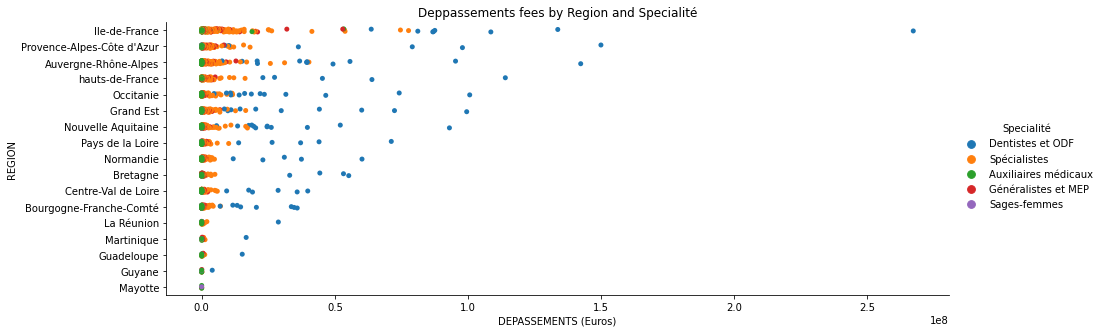

In [40]:
ax1 = sns.catplot(data=plot, x = 'DEPASSEMENTS (Euros)', y='REGION',
            hue='Specialité', height=4.5, aspect=3).set(title = 'Deppassements fees by Region and Specialité')

> In each region we see a tendency that the top 2 specialité (Dentistes and Spécialistes) have higher exceeding fees than other specialities.

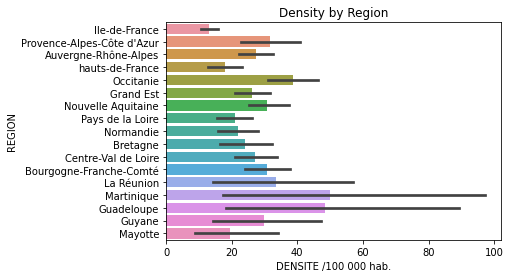

In [41]:
ax3 = sns.barplot(data=plot, x = 'DENSITE /100 000 hab.', y='REGION').set(title = 'Density by Region')

> Interresting Relations
- Ile-de-France is the region with the highest exceeding, but its density is the lowest. 
- Martinique and Guadeloupe have low exceeding fees but a high density.

# As we have an overview of geographic Data, let's find interesting cases for the different specialities

**Visualisation of Different density by specialités**

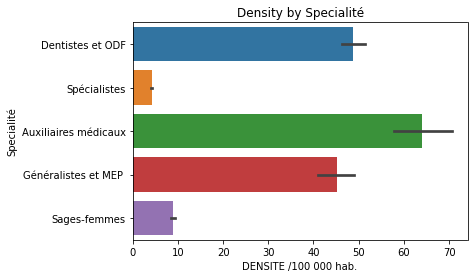

In [42]:
ax2 = sns.barplot(data=plot, x = 'DENSITE /100 000 hab.', y='Specialité').set(title = 'Density by Specialité')

**Specialité Ranked by DEPASSEMENTS (Euros)**

In [43]:
S = plot.groupby('Specialité')
S.mean().sort_values("DEPASSEMENTS (Euros)", ascending=False)

,EFFECTIFS,DEPASSEMENTS (Euros),POPULATION FRANCAISE,DENSITE /100 000 hab.
Specialité,,,,
Dentistes et ODF,349.120000,4.194006e+07,6.672233e+05,48.745788
Spécialistes,40.452621,2.448603e+06,1.038449e+06,4.179538
Généralistes et MEP,308.760925,1.265176e+06,8.369204e+05,45.146767
Auxiliaires médicaux,424.311547,2.286952e+05,7.015549e+05,64.076763
Sages-femmes,64.365591,4.966296e+04,7.052445e+05,8.909656


**Specialité Ranked by DENSITE /100 000 hab.**

In [44]:
SD = plot.groupby('Specialité')
SD.mean().sort_values("DENSITE /100 000 hab.", ascending=False)

,EFFECTIFS,DEPASSEMENTS (Euros),POPULATION FRANCAISE,DENSITE /100 000 hab.
Specialité,,,,
Auxiliaires médicaux,424.311547,2.286952e+05,7.015549e+05,64.076763
Dentistes et ODF,349.120000,4.194006e+07,6.672233e+05,48.745788
Généralistes et MEP,308.760925,1.265176e+06,8.369204e+05,45.146767
Sages-femmes,64.365591,4.966296e+04,7.052445e+05,8.909656
Spécialistes,40.452621,2.448603e+06,1.038449e+06,4.179538


>
- The dentistes have the highest exceeding fees with a high density.
- We notice Spécialistes have high exceeding fees whereas their density is the lowest.
- Auxiliaires médicaux have the highest density but with lower exceding fees.

# Correlation Analysis

## First, we analyse the correlation between Exceeding fees and Density for the Dentists

In [190]:
fradent = plot.loc[(plot['Specialité'] == 'Dentistes et ODF')]

<AxesSubplot:title={'center':'Relation Between Exceeding fees and Density For Dentists'}, xlabel='DEPASSEMENTS (Euros)', ylabel='DENSITE /100 000 hab.'>

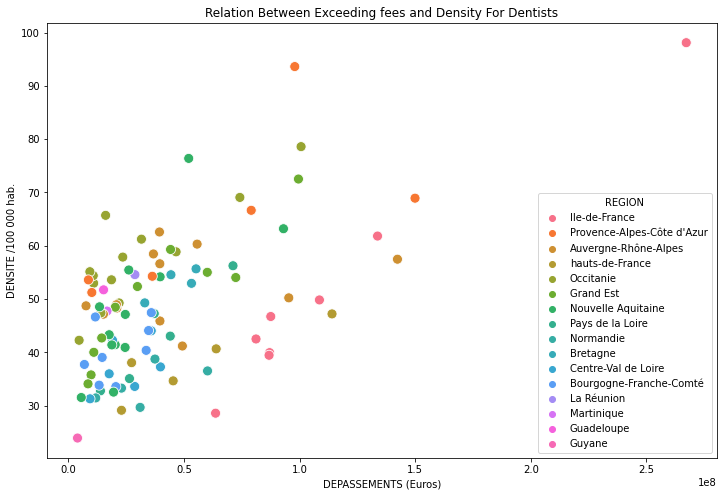

In [246]:
plt.figure(figsize=(12,8))
plt.title('Relation Between Exceeding fees and Density For Dentists')
sns.scatterplot(data = fradent, x = 'DEPASSEMENTS (Euros)', y='DENSITE /100 000 hab.', hue='REGION', s=100)

- According to the visualisation we find a weak positive correlation in general. However, in specific regions we find more strong correlation.

In [192]:
fradent.corr()

,EFFECTIFS,DEPASSEMENTS (Euros),DENSITE /100 000 hab.
EFFECTIFS,1.000000,0.967202,0.636391
DEPASSEMENTS (Euros),0.967202,1.000000,0.550778
DENSITE /100 000 hab.,0.636391,0.550778,1.000000


- The correlation table confirm that there is moderate positive correlation (0.550778) between Density and Depassements for Dentists in France.

## Then, we analyse the correlation between Exceeding fees and Density for the Spécialistes

In [247]:
fraspe = plot.loc[(plot['Specialité'] == 'Spécialistes')]

<AxesSubplot:title={'center':'Relation Between Exceeding fees and Density for Spécialistes'}, xlabel='DEPASSEMENTS (Euros)', ylabel='DENSITE /100 000 hab.'>

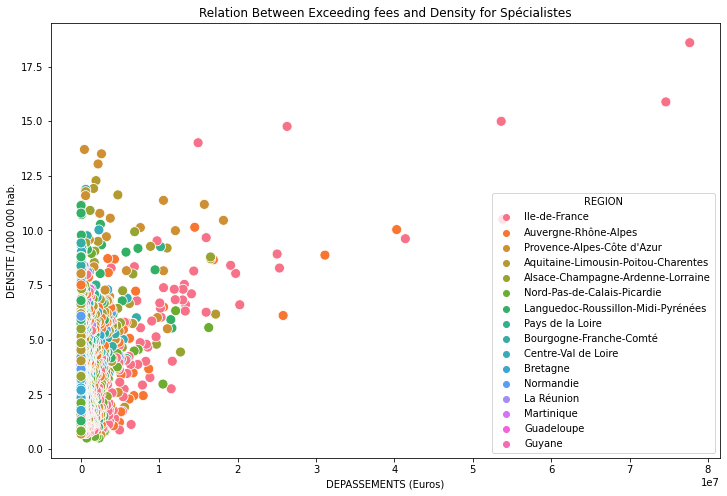

In [249]:
plt.figure(figsize=(12,8))
plt.title('Relation Between Exceeding fees and Density for Spécialistes')
sns.scatterplot(data = fraspe, x = 'DEPASSEMENTS (Euros)', y='DENSITE /100 000 hab.', hue='REGION', s=100)

- According to the visualisation we find no correlation in general.

In [213]:
fraspe.corr()

,EFFECTIFS,DEPASSEMENTS (Euros),DENSITE /100 000 hab.
EFFECTIFS,1.000000,0.718442,0.691946
DEPASSEMENTS (Euros),0.718442,1.000000,0.428118
DENSITE /100 000 hab.,0.691946,0.428118,1.000000


- The correlation table show that there is a weak correlation (0.428118) between Density and Depassements for Spécialistes in France.

## Lastly, we analyse the correlation between Exceeding fees and Density for the Auxiliaires médicaux

In [251]:
fraaux = plot.loc[(plot['Specialité'] == 'Auxiliaires médicaux')]

<AxesSubplot:title={'center':'Relation Between Exceeding fees and Density for Auxiliaires médicaux'}, xlabel='DEPASSEMENTS (Euros)', ylabel='DENSITE /100 000 hab.'>

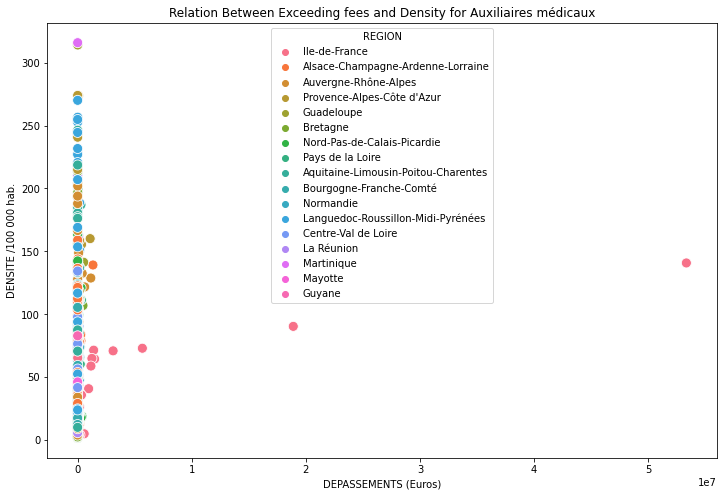

In [252]:
plt.figure(figsize=(12,8))
plt.title('Relation Between Exceeding fees and Density for Auxiliaires médicaux')
sns.scatterplot(data = fraaux, x = 'DEPASSEMENTS (Euros)', y='DENSITE /100 000 hab.', hue='REGION', s=100)

- According to the visualisation we dont find any correlation.

In [221]:
fraaux.corr()

,EFFECTIFS,DEPASSEMENTS (Euros),DENSITE /100 000 hab.
EFFECTIFS,1.000000,0.231542,0.636588
DEPASSEMENTS (Euros),0.231542,1.000000,0.062006
DENSITE /100 000 hab.,0.636588,0.062006,1.000000


- The correlation table confirm that there is not any correlation (0.062006) between Density and Depassements for Auxiliaires médicaux in France.

# Data Exploration (Sprecific cases)

### Ile-de-France

**As Ile de France as the highest depassement and a low density we do a deeper analysis for this region**

### First, we analyse the correlation between Exceeding fees and Density for the Dentists

In [160]:
idf1 = plot.loc[(plot['REGION'] == 'Ile-de-France')& ((plot['Specialité'] == 'Dentistes et ODF'))]

<AxesSubplot:title={'center':'Relation Between Exceeding fees and Density for Dentists in Ile de France'}, xlabel='DEPASSEMENTS (Euros)', ylabel='DENSITE /100 000 hab.'>

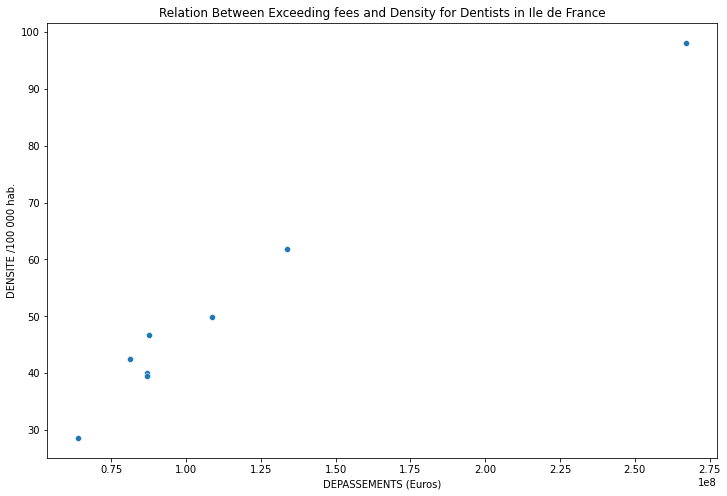

In [258]:
plt.figure(figsize=(12,8))
plt.title('Relation Between Exceeding fees and Density for Dentists in Ile de France')
sns.scatterplot(data = idf1, x = 'DEPASSEMENTS (Euros)', y='DENSITE /100 000 hab.')

- According to the visualisation we see a strong positive correlation.

In [162]:
idf1.corr()

,EFFECTIFS,DEPASSEMENTS (Euros),DENSITE /100 000 hab.
EFFECTIFS,1.000000,0.994619,0.980385
DEPASSEMENTS (Euros),0.994619,1.000000,0.984331
DENSITE /100 000 hab.,0.980385,0.984331,1.000000


- Indeed, there is a strong positive correlation between Density and Depassmement in the field of Dentistes et ODF. (**corr coefficient = 0.98**)

## Then, we analyse the correlation between Exceeding fees and Density for the Spécialistes

In [163]:
idf2 = plot.loc[(plot['REGION'] == 'Ile-de-France')& ((plot['Specialité'] == 'Spécialistes'))]

[Text(0.5, 1.0, 'Relation Between Exceeding fees and Density for spécialistes')]

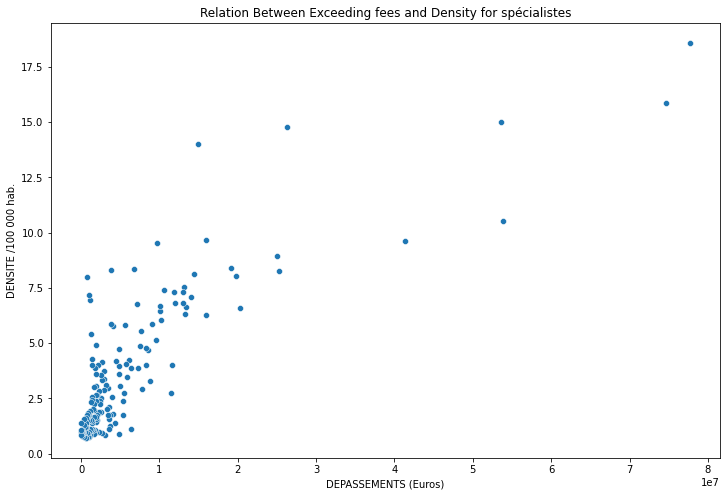

In [257]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = idf2, x = 'DEPASSEMENTS (Euros)', y='DENSITE /100 000 hab.').set(title = 'Relation Between Exceeding fees and Density for spécialistes')

- According to the visualisation we find a positive correlation in general. However there is a lot of outliers.

In [165]:
idf2.corr()

,EFFECTIFS,DEPASSEMENTS (Euros),DENSITE /100 000 hab.
EFFECTIFS,1.000000,0.869497,0.971354
DEPASSEMENTS (Euros),0.869497,1.000000,0.814664
DENSITE /100 000 hab.,0.971354,0.814664,1.000000


> 
- Indeed, In Ile-de-France we have a strong positive correlation between Density and Depassmement in the field of Spécialistes. (**corr coefficient = 0.81**)

### Lastly, we analyse the correlation between Exceeding fees and Density for the Auxiliaires médicaux

In [166]:
idf3 = plot.loc[(plot['REGION'] == 'Ile-de-France')& ((plot['Specialité'] == 'Auxiliaires médicaux'))]

[Text(0.5, 1.0, 'Relation Between Exceeding fees and Density for Auxiliaires médicaux')]

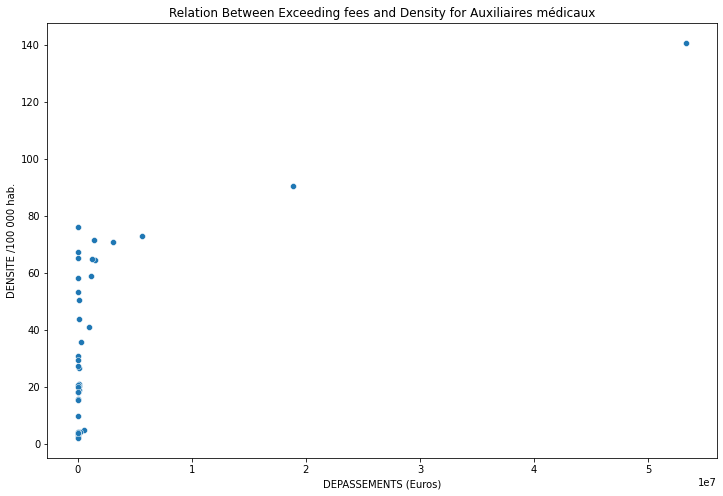

In [256]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = idf3, x = 'DEPASSEMENTS (Euros)', y='DENSITE /100 000 hab.').set(title = 'Relation Between Exceeding fees and Density for Auxiliaires médicaux')

- Knowing that there is almost no depassement in the field of Auxiliaires médicaux, there is no possible correlation 

In [169]:
idf3.corr()

,EFFECTIFS,DEPASSEMENTS (Euros),DENSITE /100 000 hab.
EFFECTIFS,1.000000,0.788944,0.958718
DEPASSEMENTS (Euros),0.788944,1.000000,0.660073
DENSITE /100 000 hab.,0.958718,0.660073,1.000000


- It seems like outliers decrease the correlation table's reliability. 

## Since Martinique and Guadeloupe have intersting characteristics (high density and Low Depassement --> Opposite of Ile de France), we do correlation analysis between Exceeding Fees and Density.

In [260]:
martguad = plot.loc[(plot['REGION'] == 'Martinique')|(plot['REGION'] == 'Guadeloupe')]

[Text(0.5, 1.0, 'Relation analysis between Exceeding Fees and Density')]

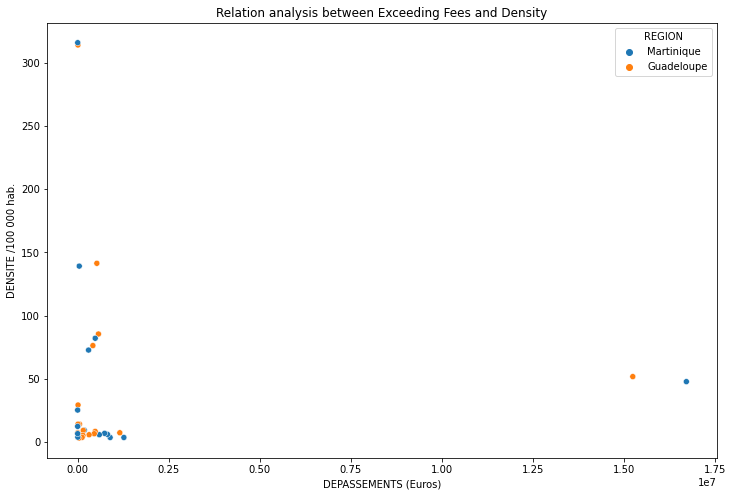

In [262]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = martguad, x = 'DEPASSEMENTS (Euros)', y='DENSITE /100 000 hab.', hue='REGION').set(title = 'Relation analysis between Exceeding Fees and Density')

- According to the visualisation we dont find any correlation.

In [185]:
martguad.corr()

,EFFECTIFS,DEPASSEMENTS (Euros),DENSITE /100 000 hab.
EFFECTIFS,1.000000,-0.009038,0.999590
DEPASSEMENTS (Euros),-0.009038,1.000000,-0.009147
DENSITE /100 000 hab.,0.999590,-0.009147,1.000000


- The Correlation table confirm that there is not any relation between Depassement and Densité

**We conclude that in general depassement and density doesn't have a strong link. Howerever we found some correlation when we specificly analyse by 'top' spéciality. Indeed, we found positive correlations for Dentists and Spécialists in France, especially in the Region Ile de France. Also, an interesting fact that the higher the depassement is in the regions the lower the density of specialistes.**